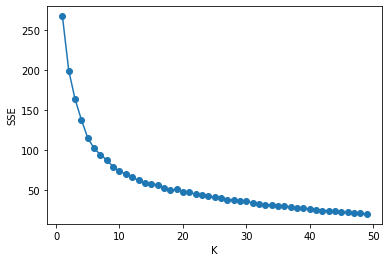

In [1]:
#####C项目：汽车产品聚类分析 工号：15785 姓名：彭宇 #####
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np
data = pd.read_csv('CarPrice_Assignment.csv')#载入数据
train_x = data.drop(['car_ID','CarName'],axis=1)#去除无用数据列，提取所需数据列，创建训练数据集
# 使用LabelEncoder将多个字段中的文本类型特征转化为数字
from sklearn.preprocessing import LabelEncoder
cols = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']#待转化字段
le = LabelEncoder()
for col in cols:
    train_x[col] = le.fit_transform(train_x[col])
# 将数据规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
pd.DataFrame(train_x).to_csv('temp.csv', index=False)
# 使用K-Means 手肘法：统计不同K取值的误差平方和，选取合适的K值
import matplotlib.pyplot as plt
sse = []
for k in range(1, 50):
	# kmeans算法
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
x = range(1, 50)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

In [2]:
#由手肘法绘图可取K=10，使用KMeans聚类
kmeans = KMeans(n_clusters=10)#尝试将数据分为10类
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print(result)#打印聚类结果
result.to_csv('CarPrice_Assignment_cluster_result.csv',index=False)# 将聚类结果导出到CSV文件中

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [3]:
#找出所有VW车型对应的竞品车型
#所有VW车型名称
VW=['vokswagen rabbit','volkswagen 1131 deluxe sedan','volkswagen model 111','volkswagen type 3','volkswagen 411 (sw)','volkswagen super beetle','volkswagen dasher','vw dasher','vw rabbit','volkswagen rabbit','volkswagen rabbit custom']
#提取与VW车型相同聚类的所有车型
for vw in VW:
	Group_num = result[result['CarName'].isin([vw])]['聚类结果'].tolist()#提取VW车型对应的聚类结果编号
	Rivals = result.loc[result['聚类结果']==int(Group_num[0])]['CarName']#提取与VW车型相同聚类结果的车型竞品名称
	Rival_list=[]
	for r in Rivals:
		if r != vw:#去除竞品车型列表中与自身车型重复的名称
			Rival_list.append(r)
	Rival_string = ', '.join(Rival_list)#以逗号分隔竞品车型名称列表并转化为字符串
	print(str(vw)+' 的竞争车型有：'+Rival_string+'\n\n')#打印各VW车型对应竞品车型名称

vokswagen rabbit 的竞争车型有：mazda glc deluxe, mazda rx-7 gs, nissan gt-r, toyota corona, toyota corolla, volkswagen model 111, volkswagen super beetle, volkswagen rabbit custom


volkswagen 1131 deluxe sedan 的竞争车型有：chevrolet impala, chevrolet monte carlo, dodge rampage, dodge challenger se, honda civic, honda civic cvcc, honda civic, honda accord cvcc, honda civic cvcc, honda accord, honda civic 1300, honda civic (auto), isuzu D-Max , maxda rx3, maxda glc deluxe, mazda rx2 coupe, mazda 626, mazda glc custom, mitsubishi mirage, mitsubishi lancer, mitsubishi outlander, mitsubishi g4, Nissan versa, nissan rogue, nissan leaf, nissan juke, nissan clipper, plymouth fury iii, subaru, subaru dl, subaru dl, toyota corona mark ii, toyota corona, toyota corolla liftback, toyota corona


volkswagen model 111 的竞争车型有：mazda glc deluxe, mazda rx-7 gs, nissan gt-r, toyota corona, toyota corolla, vokswagen rabbit, volkswagen super beetle, volkswagen rabbit custom


volkswagen type 3 的竞争车型有：audi 100 ls, audi